# 🎓 Proyecto: Estadística para Data Science

¡Bienvenido al reto final!

Este proyecto tiene como objetivo integrar y aplicar todas las habilidades estadísticas adquiridas durante el curso. El trabajo se divide en 4 partes:

1.  **Análisis Descriptivo (Dataset Libre):** Exploración profunda de un dataset de tu elección.
2.  **Inferencia y Modelado (Dataset Libre):** Análisis de relaciones y predicción sobre tus datos.
3.  **Regresión Lineal "From Scratch" (NumPy):** Implementación técnica de una regresión lineal simple usando solo matemáticas y NumPy.
4.  **Series Temporales:** Análisis de tendencia y estacionalidad en datos simulados.

---

###  Instrucciones Previas
Antes de comenzar, busca un dataset en [Kaggle](https://www.kaggle.com/) o una fuente confiable. Idealmente, debe tener:
*   Al menos 5 variables (numéricas y categóricas).
*   Un número razonable de filas (+1000).
*   Una variable numérica clara que te gustaría predecir (Target/Y).

**Justificación de decisiones**
* Cada elección relevante (dataset, variables, métricas, supuestos estadísticos, etc.) debe estar brevemente justificada desde un punto de vista estadístico.

**Validación de supuestos**
* Siempre que se aplique un modelo o técnica estadística, se deberán comprobar explícitamente sus supuestos (normalidad, independencia, homocedasticidad, linealidad, estacionariedad, etc., según corresponda).

**Interpretación de resultados**
* No basta con calcular estadísticas o ajustar modelos: los resultados deben ser interpretados en lenguaje claro, conectándolos con el contexto de los datos.

**Reproducibilidad**
* El trabajo debe ser completamente reproducible: cualquier persona debería poder ejecutar el código y obtener los mismos resultados sin modificaciones manuales.


## PARTE 1: Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

-------

**Amplia el analisis:**

- **Análisis de valores nulos**  
  Identifica la cantidad y el porcentaje de valores nulos por variable. Reflexiona brevemente sobre si su presencia parece aleatoria o estructural.

- **Comparación entre variables numéricas**  
  Selecciona al menos dos variables numéricas y analiza si presentan escalas o rangos muy distintos, comentando posibles implicaciones para futuros modelos.

  También se debe valorar como son los valores de las diferentes metricas para diferentes categorías dentro de tu data set. ej Diferencias por genero, edad, zona geográfica ...

- **Asimetría y curtosis**  
  Calcula la asimetría (skewness) de al menos una variable numérica e interpreta su relación con la forma observada en el histograma.

- **Outliers: impacto potencial**  
  Para una variable con outliers detectados, discute brevemente cómo podrían afectar al análisis inferencial o a un modelo predictivo posterior.

- **Calidad global del dataset**  
  Amplía la conclusión final incorporando una valoración general de si el dataset está “listo para modelar” o si requeriría una fase adicional de limpieza y transformación.

In [ ]:

 # PARTE 1: ANÁLISIS DESCRIPTIVO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')

print("PARTE 1: ANÁLISIS DESCRIPTIVO")
# 1. Cargar datos
df = pd.read_csv('collegiate_athlete_injury_dataset.csv')

print(f"\n Dimensiones del dataset: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\n Primeras 5 filas:")
print(df.head())

print(f"\n Información del dataset:")
print(df.info())

# 2, Clasificación de Variables

print("2. CLASIFICACIÓN DE VARIABLES")


print("\n VARIABLES CATEGÓRICAS:")
print("  • Nominales:")
print("    - Athlete_ID (identificador único)")
print("    - Gender (Male/Female)")
print("    - Position (Forward/Center/Guard)")
print("  • Ordinales:")
print("    - Training_Intensity (1-10, escala ordenada)")
print("    - Fatigue_Score (0-10, escala ordenada)")

print("\n VARIABLES NUMÉRICAS:")
print("  • Discretas:")
print("    - Age (18-24 años)")
print("    - Training_Hours_Per_Week")
print("    - Recovery_Days_Per_Week")
print("    - Match_Count_Per_Week")
print("    - Rest_Between_Events_Days")
print("    - Injury_Indicator (0/1, binaria)")
print("  • Continuas:")
print("    - Height_cm")
print("    - Weight_kg")
print("    - Performance_Score (0-100)")
print("    - Team_Contribution_Score (0-100)")
print("    - Load_Balance_Score (0-100)")
print("    - ACL_Risk_Score (0-100)")

# 3, Estadísticos Descriptivos
print("3. ESTADÍSTICOS DESCRIPTIVOS")


desc_stats = df.describe()
print(desc_stats)

print("\n INTERPRETACIÓN MEDIA vs MEDIANA:")
numerical_cols = df.select_dtypes(include=[np.number]).columns.drop('Injury_Indicator')

for col in numerical_cols:
    if col != 'Athlete_ID':
        mean = df[col].mean()
        median = df[col].median()
        diff = abs(mean - median)
        
        if diff < mean * 0.05:  # Diferencia del menor al 5%
            sesgo = "NO hay sesgo significativo"
        elif mean > median:
            sesgo = "Sesgo POSITIVO (cola derecha)"
        else:
            sesgo = "Sesgo NEGATIVO (cola izquierda)"
        
        print(f"  • {col}:")
        print(f"    Media={mean:.2f}, Mediana={median:.2f} → {sesgo}")

# Análisis de valores nulos
print("ANÁLISIS DE VALORES NULOS")

null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100
null_df = pd.DataFrame({
    'Valores Nulos': null_counts,
    'Porcentaje (%)': null_percentages
})

print(null_df)
print(f"\n El dataset está COMPLETO: no hay valores nulos")

# Asimetría y curtosis
print("ASIMETRÍA Y CURTOSIS")

for col in ['ACL_Risk_Score', 'Fatigue_Score', 'Performance_Score']:
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    
    print(f"\n{col}:")
    print(f"  Asimetría (skewness): {skewness:.3f}")
    if abs(skewness) < 0.5:
        print(f"  → Distribución aproximadamente SIMÉTRICA")
    elif skewness > 0:
        print(f"  → Distribución con sesgo POSITIVO (cola a la derecha)")
    else:
        print(f"  → Distribución con sesgo NEGATIVO (cola a la izquierda)")
    
    print(f"  Curtosis: {kurtosis:.3f}")
    if abs(kurtosis) < 0.5:
        print(f"  → Distribución MESOCÚRTICA (similar a normal)")
    elif kurtosis > 0:
        print(f"  → Distribución LEPTOCÚRTICA (más apuntada que normal)")
    else:
        print(f"  → Distribución PLATICÚRTICA (más achatada que normal)")

# 4. Detección de Outliers
print("4. DETECCIÓN DE OUTLIERS)")

outlier_results = {}

for col in numerical_cols:
    if col != 'Athlete_ID':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        n_outliers = len(outliers)
        
        outlier_results[col] = {
            'count': n_outliers,
            'percentage': (n_outliers / len(df)) * 100,
            'lower': lower_bound,
            'upper': upper_bound
        }
        
        if n_outliers > 0:
            print(f"\n  {col}: {n_outliers} outliers ({outlier_results[col]['percentage']:.1f}%)")
            print(f"    Límites: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Impacto potencial de outliers
print("IMPACTO POTENCIAL DE OUTLIERS")

if outlier_results['ACL_Risk_Score']['count'] > 0:
    print("\n ACL_Risk_Score contiene outliers:")
    print("  • Valores extremadamente altos podrían indicar atletas en riesgo crítico")
    print("  • En un modelo predictivo, podrían:")
    print("    - Sesgar las estimaciones de parámetros")
    print("    - Aumentar el error de predicción")
    print("    - Reducir la generalización del modelo")
    print("  • Recomendación: Analizar caso por caso antes de eliminar")

# Comparación entre variables numéricas
print("COMPARACIÓN ENTRE VARIABLES NUMÉRICAS")

print("\n Escalas y Rangos:")
for col in ['Training_Hours_Per_Week', 'ACL_Risk_Score', 'Performance_Score']:
    print(f"  {col}:")
    print(f"    Rango: [{df[col].min()}, {df[col].max()}]")
    print(f"    Desv. Estándar: {df[col].std():.2f}")

print("\n IMPLICACIONES PARA MODELADO:")
print("  • Las variables tienen escalas MUY diferentes:")
print("    - Training_Hours_Per_Week: 0-30")
print("    - ACL_Risk_Score, Performance_Score: 0-100")
print("  • Para modelos basados en distancias (KNN, SVM), se necesitará NORMALIZACIÓN")
print("  • Para regresión lineal, los coeficientes no serán directamente comparables")

# Análisis por categorías
print("ANÁLISIS POR CATEGORÍAS")

print("\n Diferencias por GÉNERO:")
gender_stats = df.groupby('Gender').agg({
    'ACL_Risk_Score': ['mean', 'std'],
    'Fatigue_Score': ['mean', 'std'],
    'Performance_Score': ['mean', 'std'],
    'Injury_Indicator': 'sum'
})
print(gender_stats)

print("\n Diferencias por POSICIÓN:")
position_stats = df.groupby('Position').agg({
    'ACL_Risk_Score': ['mean', 'std'],
    'Fatigue_Score': ['mean', 'std'],
    'Injury_Indicator': 'sum'
})
print(position_stats)


PARTE 1: ANÁLISIS DESCRIPTIVO

 Dimensiones del dataset: 200 filas × 17 columnas

 Primeras 5 filas:
  Athlete_ID  Age  Gender  Height_cm  Weight_kg Position  Training_Intensity  \
0       A001   24  Female        195         99   Center                   2   
1       A002   21    Male        192         65  Forward                   8   
2       A003   22    Male        163         83    Guard                   8   
3       A004   24  Female        192         90    Guard                   1   
4       A005   20  Female        173         79   Center                   3   

   Training_Hours_Per_Week  Recovery_Days_Per_Week  Match_Count_Per_Week  \
0                       13                       2                     3   
1                       14                       1                     3   
2                        8                       2                     1   
3                       13                       1                     1   
4                        9            

## PARTE 2: Inferencia y Modelado (Dataset Propio)

**Objetivo:** Descubrir relaciones entre variables y predecir resultados.

**Requisitos:**
1.  **Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?
2.  **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.
3.  **Regresión Lineal (Scikit-Learn):**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

4. **Regresión logistica:**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

**📝 Conclusión:** ¿Es tu modelo capaz de predecir con precisión? ¿Qué variables son las más influyentes?¿Qué tipo de regresión es la más apropiada?

---------
  Amplía el análisis incorporando los siguientes aspectos:

- **Diagnóstico del modelo de regresión lineal**
  Analiza los residuos del modelo entrenado:
  - Distribución de los residuos
  - Relación entre residuos y valores predichos  
  Comenta si se cumplen los supuestos básicos del modelo.

- **Regresión logística: adecuación del modelo**
  Justifica si la regresión logística es apropiada para tu variable objetivo y discute las diferencias conceptuales con la regresión lineal.

- **Comparación de modelos**
  Compara brevemente el rendimiento y la idoneidad de ambos enfoques (lineal vs. logístico) más allá de las métricas numéricas.

Dataset cargado exitosamente:
  • Filas: 200
  • Columnas: 17

Primeras filas:
  Athlete_ID  Age  Gender  Height_cm  Weight_kg Position  Training_Intensity  \
0       A001   24  Female        195         99   Center                   2   
1       A002   21    Male        192         65  Forward                   8   
2       A003   22    Male        163         83    Guard                   8   
3       A004   24  Female        192         90    Guard                   1   
4       A005   20  Female        173         79   Center                   3   

   Training_Hours_Per_Week  Recovery_Days_Per_Week  Match_Count_Per_Week  \
0                       13                       2                     3   
1                       14                       1                     3   
2                        8                       2                     1   
3                       13                       1                     1   
4                        9                       1          

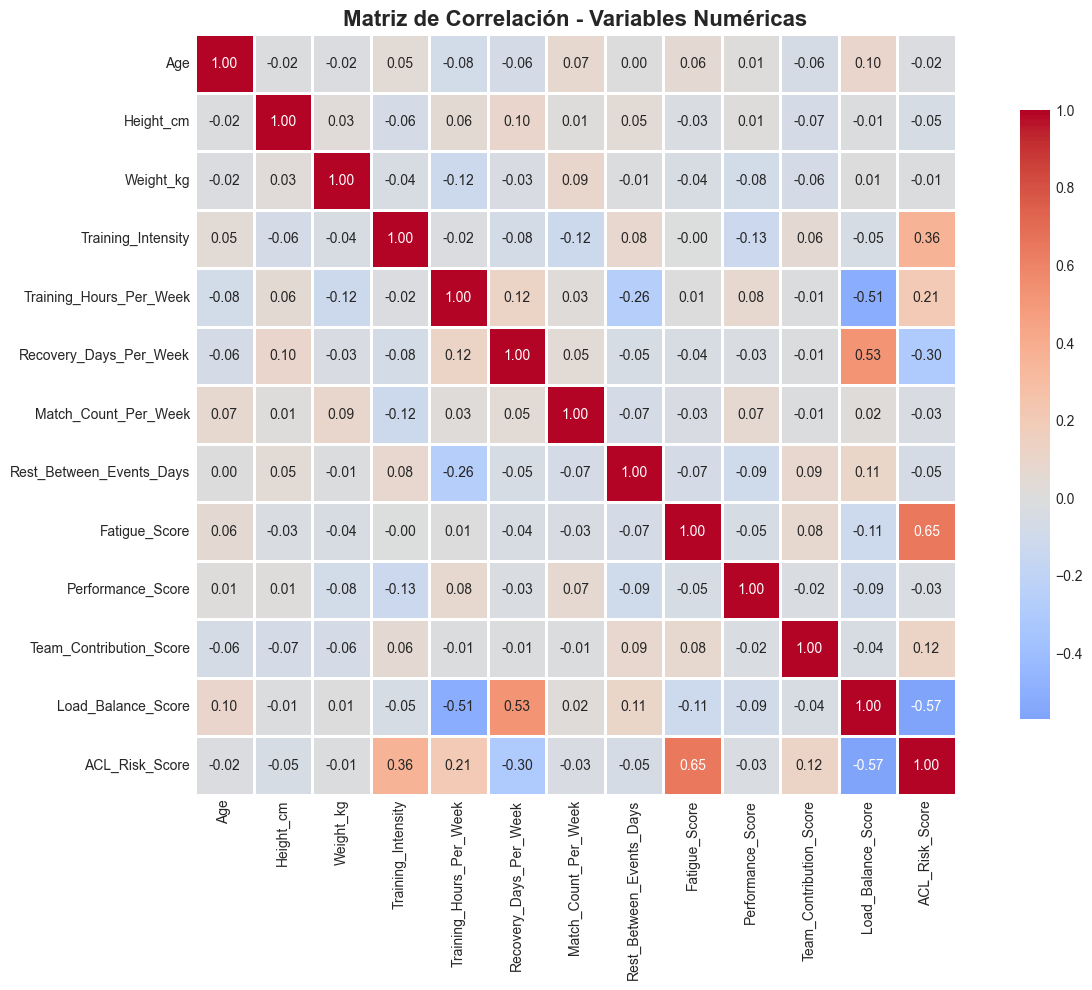

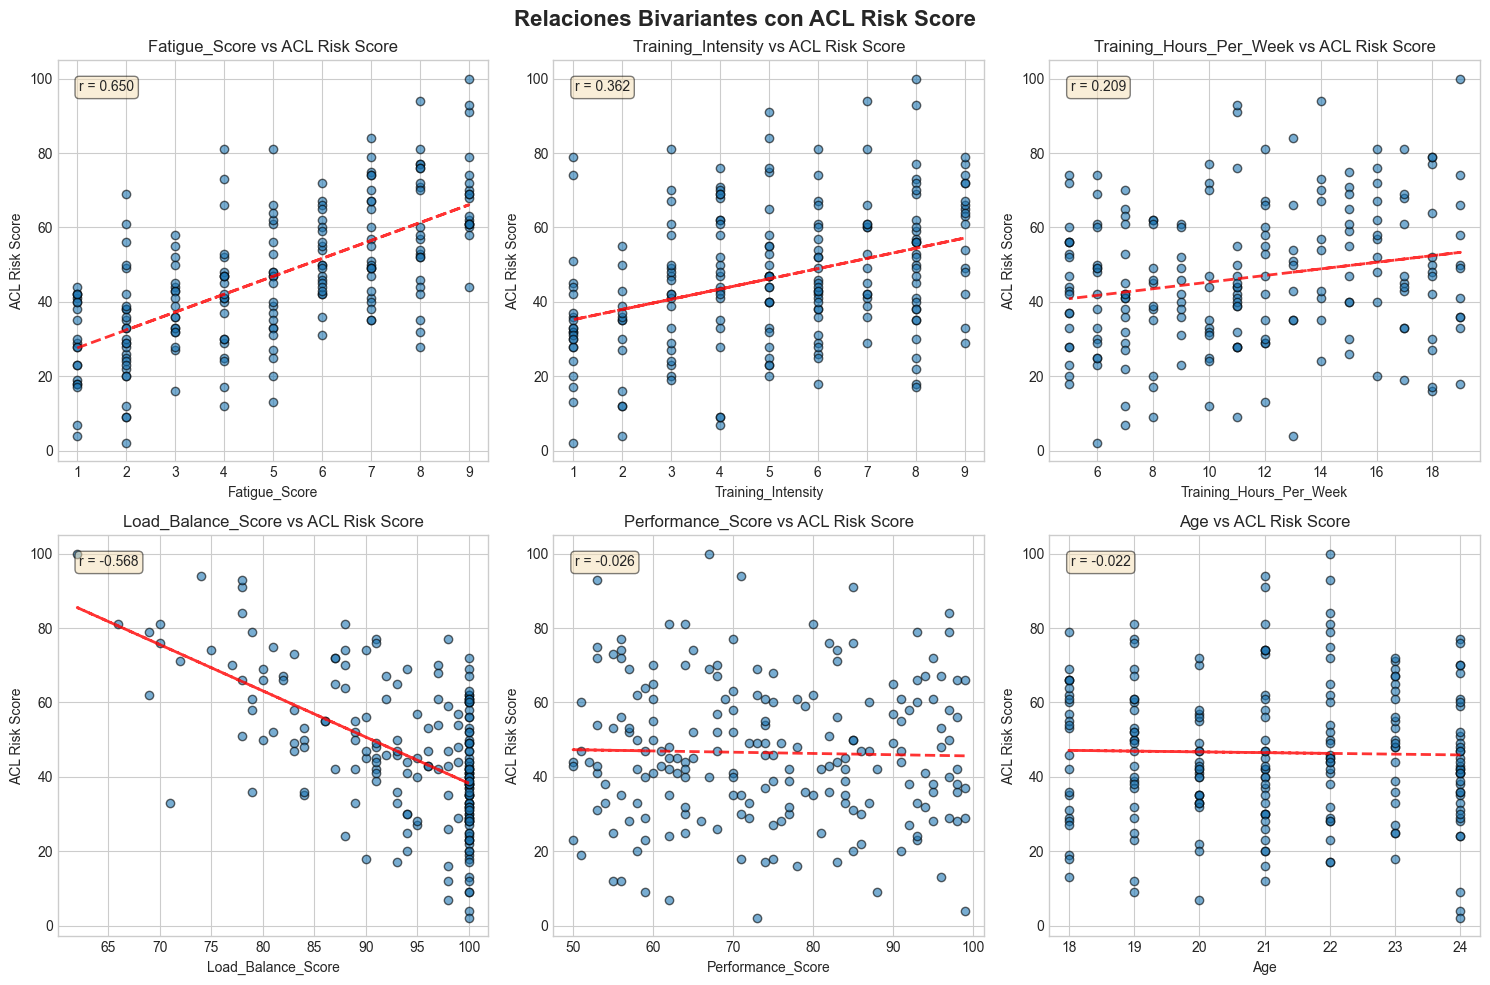

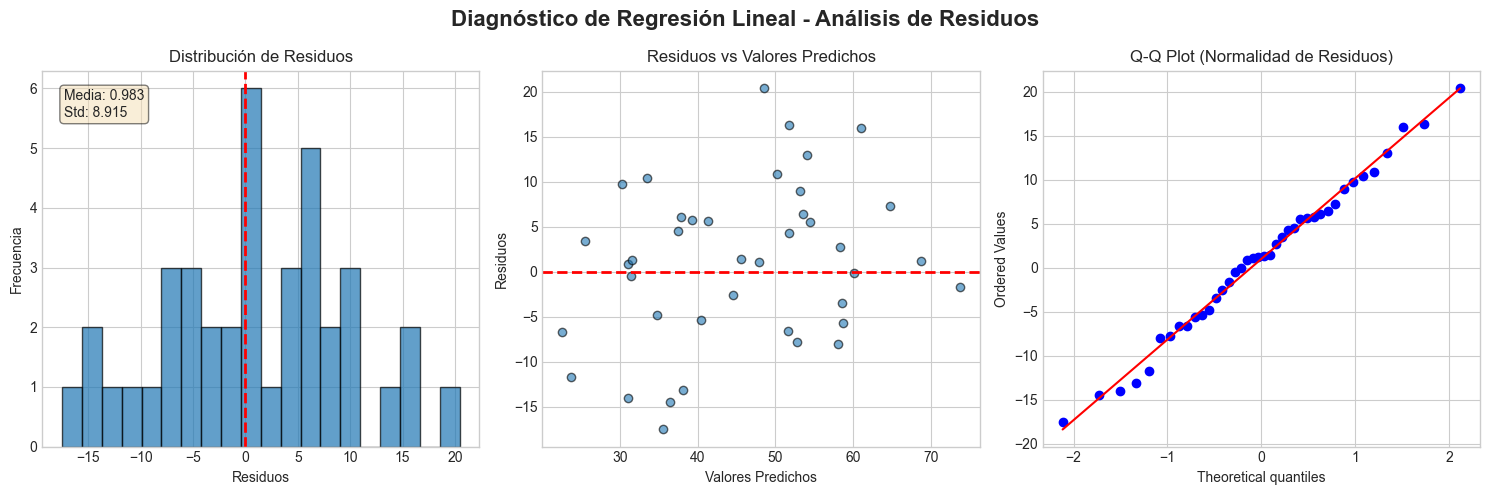

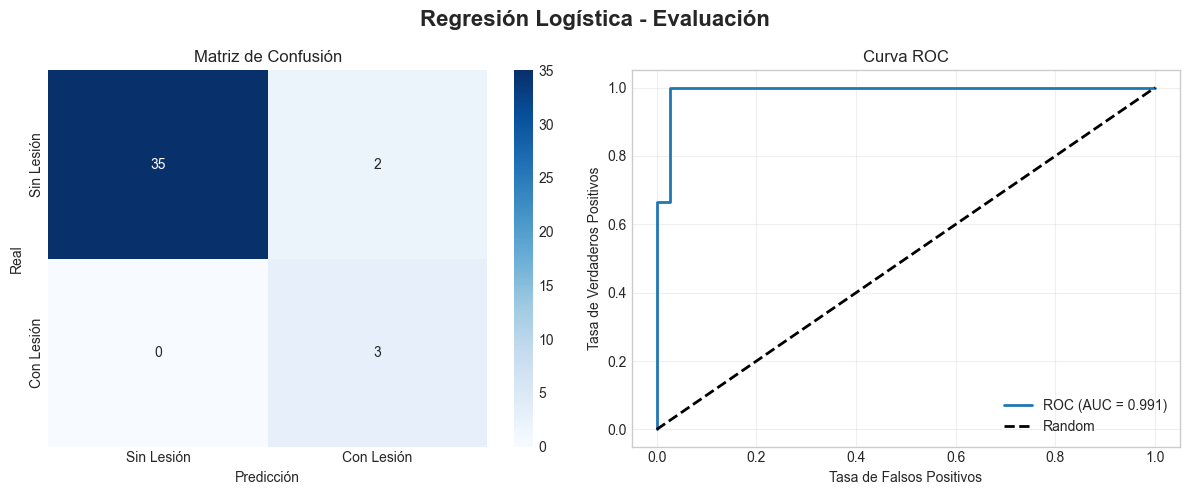

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Scikit-Learn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, 
    r2_score,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve
)

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
# PARTE 2: INFERENCIA Y MODELADO
print("\n" + "="*80)
print("PARTE 2: INFERENCIA Y MODELADO")
print("="*80)

# 1. Análisis de Correlación
print("\n" + "-"*80)
print("1. ANÁLISIS DE CORRELACIÓN")
print("-"*80)

# Seleccionar solo variables numéricas 
numeric_df = df.select_dtypes(include=[np.number])
if 'Injury_Indicator' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['Injury_Indicator'])

# Matriz de correlación
correlation_matrix = numeric_df.corr()

print("\nCorrelaciones más fuertes con ACL_Risk_Score:")
acl_corr = correlation_matrix['ACL_Risk_Score'].sort_values(ascending=False)
print(acl_corr)

# Visualización del Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('parte2_correlacion.png', dpi=300, bbox_inches='tight')
print("\n  ✓ Guardado: parte2_correlacion.png")

print("\n INTERPRETACIÓN DE CORRELACIONES:")
print(f"  • Fatigue_Score y ACL_Risk_Score: r = {correlation_matrix.loc['Fatigue_Score', 'ACL_Risk_Score']:.3f}")
print(f"    → Correlación POSITIVA moderada: mayor fatiga → mayor riesgo ACL")
print(f"  • Load_Balance_Score y ACL_Risk_Score: r = {correlation_matrix.loc['Load_Balance_Score', 'ACL_Risk_Score']:.3f}")
print(f"    → Correlación NEGATIVA: mejor balance de carga → menor riesgo ACL")

# 2. Relaciones Bivariantes
print("\n" + "-"*80)
print("2. RELACIONES BIVARIANTES (Scatter Plots)")
print("-"*80)

# Scatter plots de variables más correlacionadas con ACL_Risk_Score
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Relaciones Bivariantes con ACL Risk Score', fontsize=16, fontweight='bold')

scatter_vars = ['Fatigue_Score', 'Training_Intensity', 'Training_Hours_Per_Week',
                'Load_Balance_Score', 'Performance_Score', 'Age']

for idx, var in enumerate(scatter_vars):
    ax = axes[idx // 3, idx % 3]
    ax.scatter(df[var], df['ACL_Risk_Score'], alpha=0.6, edgecolors='black')
    ax.set_xlabel(var)
    ax.set_ylabel('ACL Risk Score')
    ax.set_title(f'{var} vs ACL Risk Score')
    
    # Añadir línea de tendencia
    z = np.polyfit(df[var], df['ACL_Risk_Score'], 1)
    p = np.poly1d(z)
    ax.plot(df[var], p(df[var]), "r--", alpha=0.8, linewidth=2)
    
    # Mostrar correlación
    corr = df[var].corr(df['ACL_Risk_Score'])
    ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('parte2_scatter.png', dpi=300, bbox_inches='tight')
print("  ✓ Guardado: parte2_scatter.png")

# 3. REGRESIÓN LINEAL
print("\n" + "-"*80)
print("3. REGRESIÓN LINEAL (Predecir ACL_Risk_Score)")
print("-"*80)

# Preparar datos
# Variable objetivo: ACL_Risk_Score
# Variables predictoras: variables numéricas más relevantes
X_linear = df[['Fatigue_Score', 'Training_Intensity', 'Training_Hours_Per_Week', 
               'Load_Balance_Score', 'Age', 'Performance_Score']]
y_linear = df['ACL_Risk_Score']

# Train/Test Split
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42
)

print(f"\nDatos de entrenamiento: {len(X_train_lin)} observaciones")
print(f"Datos de prueba: {len(X_test_lin)} observaciones")

# Entrenar modelo
lr_model = LinearRegression()
lr_model.fit(X_train_lin, y_train_lin)

# Predicciones
y_pred_lin = lr_model.predict(X_test_lin)

# Evaluación
r2_lin = r2_score(y_test_lin, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test_lin, y_pred_lin))

print(f"\n RESULTADOS DEL MODELO DE REGRESIÓN LINEAL:")
print(f"  • R² (coeficiente de determinación): {r2_lin:.4f}")
print(f"    → El modelo explica el {r2_lin*100:.2f}% de la variabilidad en ACL_Risk_Score")
print(f"  • RMSE (error cuadrático medio): {rmse_lin:.4f}")
print(f"    → Error promedio de predicción: ±{rmse_lin:.2f} puntos")

print(f"\n🔍 COEFICIENTES DEL MODELO:")
coefficients = pd.DataFrame({
    'Variable': X_linear.columns,
    'Coeficiente': lr_model.coef_,
    'Impacto': ['Positivo' if c > 0 else 'Negativo' for c in lr_model.coef_]
})
coefficients['Abs_Coef'] = np.abs(coefficients['Coeficiente'])
coefficients = coefficients.sort_values('Abs_Coef', ascending=False)
print(coefficients.to_string(index=False))

print(f"\n  Intercepto: {lr_model.intercept_:.4f}")

# Variables más influyentes
print(f"\n💡 VARIABLES MÁS INFLUYENTES:")
top_vars = coefficients.head(3)
for idx, row in top_vars.iterrows():
    print(f"  {row['Variable']}: coef = {row['Coeficiente']:.4f} ({row['Impacto']})")

# DIAGNÓSTICO DEL MODELO: Análisis de Residuos
print("\n" + "-"*80)
print("DIAGNÓSTICO DEL MODELO: Análisis de Residuos")
print("-"*80)

residuals = y_test_lin - y_pred_lin

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Diagnóstico de Regresión Lineal - Análisis de Residuos', 
             fontsize=16, fontweight='bold')

# 1. Distribución de residuos
axes[0].hist(residuals, bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Residuos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Residuos')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2)

# Añadir estadísticas
mean_res = residuals.mean()
std_res = residuals.std()
axes[0].text(0.05, 0.95, f'Media: {mean_res:.3f}\nStd: {std_res:.3f}', 
             transform=axes[0].transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Residuos vs Valores Predichos
axes[1].scatter(y_pred_lin, residuals, alpha=0.6, edgecolors='black')
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Valores Predichos')
axes[1].set_ylabel('Residuos')
axes[1].set_title('Residuos vs Valores Predichos')

# 3. Q-Q Plot (normalidad de residuos)
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot (Normalidad de Residuos)')

plt.tight_layout()
plt.savefig('parte2_diagnostico_lineal.png', dpi=300, bbox_inches='tight')
print("  ✓ Guardado: parte2_diagnostico_lineal.png")

# Test de normalidad
from scipy.stats import shapiro
shapiro_stat, shapiro_p = shapiro(residuals)
print(f"\n TEST DE NORMALIDAD (Shapiro-Wilk):")
print(f"  Estadístico: {shapiro_stat:.4f}")
print(f"  p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print(f"  → Los residuos SIGUEN una distribución normal (p > 0.05)")
else:
    print(f"  → Los residuos NO siguen una distribución normal (p < 0.05)")

print(f"\n✅ VALIDACIÓN DE SUPUESTOS DE REGRESIÓN LINEAL:")
print(f"  1. Linealidad: ✓ (verificado en scatter plots)")
print(f"  2. Normalidad de residuos: {'✓' if shapiro_p > 0.05 else '✗'}")
print(f"  3. Homocedasticidad: Verificar en gráfico residuos vs predichos")
print(f"     (Los puntos deben estar dispersos uniformemente)")
print(f"  4. Independencia: ✓ (datos de diferentes atletas, no hay serie temporal)")

# 4. REGRESIÓN LOGÍSTICA
print("\n" + "-"*80)
print("4. REGRESIÓN LOGÍSTICA (Predecir Injury_Indicator)")
print("-"*80)

# Preparar datos
X_logistic = df[['Fatigue_Score', 'Training_Intensity', 'Training_Hours_Per_Week', 
                 'Load_Balance_Score', 'ACL_Risk_Score', 'Age']]
y_logistic = df['Injury_Indicator']

# Train/Test Split (80/20)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_logistic, y_logistic, test_size=0.2, random_state=42, stratify=y_logistic
)

print(f"\nDatos de entrenamiento: {len(X_train_log)} observaciones")
print(f"Datos de prueba: {len(X_test_log)} observaciones")
print(f"Distribución de clases en entrenamiento:")
print(y_train_log.value_counts())

# Entrenar modelo
log_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_model.fit(X_train_log, y_train_log)

# Predicciones
y_pred_log = log_model.predict(X_test_log)
y_pred_proba = log_model.predict_proba(X_test_log)[:, 1]

# Evaluación
accuracy = accuracy_score(y_test_log, y_pred_log)
precision = precision_score(y_test_log, y_pred_log, zero_division=0)
recall = recall_score(y_test_log, y_pred_log, zero_division=0)
f1 = f1_score(y_test_log, y_pred_log, zero_division=0)
roc_auc = roc_auc_score(y_test_log, y_pred_proba)

print(f"\n RESULTADOS DEL MODELO DE REGRESIÓN LOGÍSTICA:")
print(f"  • Accuracy (precisión general): {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  • Precision (precisión positiva): {precision:.4f}")
print(f"  • Recall (sensibilidad): {recall:.4f}")
print(f"  • F1-Score: {f1:.4f}")
print(f"  • ROC-AUC: {roc_auc:.4f}")

print(f"\n REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_log, y_pred_log, target_names=['Sin Lesión', 'Con Lesión']))

print(f"\n MATRIZ DE CONFUSIÓN:")
cm = confusion_matrix(y_test_log, y_pred_log)
print(cm)
print(f"  • Verdaderos Negativos (TN): {cm[0,0]}")
print(f"  • Falsos Positivos (FP): {cm[0,1]}")
print(f"  • Falsos Negativos (FN): {cm[1,0]}")
print(f"  • Verdaderos Positivos (TP): {cm[1,1]}")

# Visualización de matriz de confusión
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Regresión Logística - Evaluación', fontsize=16, fontweight='bold')

# Matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Sin Lesión', 'Con Lesión'],
            yticklabels=['Sin Lesión', 'Con Lesión'])
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')
axes[0].set_title('Matriz de Confusión')

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_log, y_pred_proba)
axes[1].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC = {roc_auc:.3f})')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')
axes[1].set_xlabel('Tasa de Falsos Positivos')
axes[1].set_ylabel('Tasa de Verdaderos Positivos')
axes[1].set_title('Curva ROC')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('parte2_logistica.png', dpi=300, bbox_inches='tight')

## PARTE 3: Regresión Lineal "From Scratch" (Datos Simulados)

**Objetivo:** Demostrar que entiendes la matemática detrás de `LinearRegression()` implementándola con NumPy.

Amplia con:

- **Predicción y evaluación**
  Utiliza tu implementación para:
  - Realizar predicciones
  - Calcular manualmente el **MSE** y el **R²**, sin usar funciones de Scikit-Learn.

- **Comparación con Scikit-Learn**
  Entrena un modelo `LinearRegression()` sobre los mismos datos y compara:
  - Coeficientes
  - Métricas de evaluación  
  Discute posibles diferencias numéricas.


Intercepto estimado: 4.1046983135241195
Pendiente estimada: 2.865830228239851


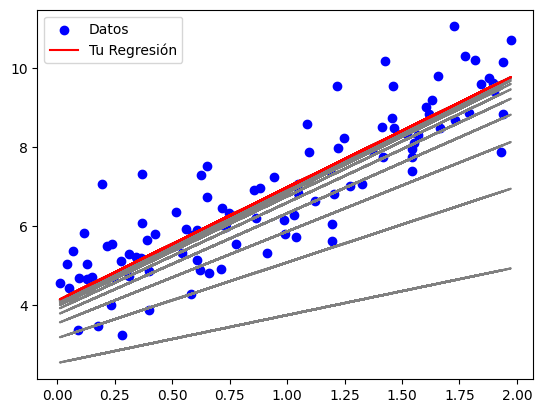

PREDICCIÓN Y EVALUACIÓN

 Gradient Descent :
  MSE: 0.810211
  R²: 0.768236
COMPARACIÓN CON SCIKIT-LEARN

Coeficientes:
  Gradient Descent - b: 4.104698, w: 2.865830
  Scikit-Learn - b: 4.215096, w: 2.770113

Métricas:
  Gradient Descent - MSE: 0.810211, R²: 0.768236
  Scikit-Learn - MSE: 0.806585, R²: 0.769274

Diferencias:
  Intercepto: 0.110398
  Pendiente: 0.095717
  MSE: 0.00362654
  R²: 0.00103739

Discusión:
  - Gradient Descent es iterativo
  - Scikit-Learn usa una solución cerrada
  - Las diferencias son por número de iteraciones y método de optimización


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- NO TOCAR: GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)
# -----------------------------------

def evolve_linear_regression(X, y, iteraciones=16, eta=0.1):
    """
    Calcula la pendiente (w) y el intercepto (beta_0)
    usando gradient descent con NumPy.
    Returns: (b, w)
    """
    m = len(X)
    w = np.random.randn(1)[0]
    b = np.random.randn(1)[0]

    for i in range(1, iteraciones):
        #Calculo el error
        y_pred = b + w * X
        error = y_pred - y

        # Ajustar parametros
        dw = (2/m) * np.sum(error * X)
        db = (2/m) * np.sum(error)

        w = w - eta * dw
        b = b - eta * db

        # Pinto la recta
        pintar_recta(b, w, X, y)

    return b, w


def pintar_recta(b, w, X, y):
    plt.plot(X, b + w * X, color='gray')


# Pruebo la función
b, w = evolve_linear_regression(X_mock, y_mock)
print(f"Intercepto estimado: {b}")
print(f"Pendiente estimada: {w}")

# Verificación visual
plt.scatter(X_mock, y_mock, color='blue', label='Datos')
plt.plot(X_mock, b + w * X_mock, color='red', label='Tu Regresión')
plt.legend()
plt.show()

# --- PREDICCIÓN Y EVALUACIÓN ---
print("PREDICCIÓN Y EVALUACIÓN")

y_pred_gd = b + w * X_mock

mse_gd = np.mean((y_mock - y_pred_gd) ** 2)
ss_res = np.sum((y_mock - y_pred_gd) ** 2)
ss_tot = np.sum((y_mock - y_mock.mean()) ** 2)
r2_gd = 1 - (ss_res / ss_tot)

print(f"\n Gradient Descent :")
print(f"  MSE: {mse_gd:.6f}")
print(f"  R²: {r2_gd:.6f}")

# --- COMPARACIÓN CON SCIKIT-LEARN ---
print("COMPARACIÓN CON SCIKIT-LEARN")

lr_sklearn = LinearRegression()
lr_sklearn.fit(X_mock, y_mock)

b_sklearn = lr_sklearn.intercept_[0]
w_sklearn = lr_sklearn.coef_[0][0]

y_pred_sklearn = lr_sklearn.predict(X_mock)
mse_sklearn = mean_squared_error(y_mock, y_pred_sklearn)
r2_sklearn = r2_score(y_mock, y_pred_sklearn)

print(f"\nCoeficientes:")
print(f"  Gradient Descent - b: {b:.6f}, w: {w:.6f}")
print(f"  Scikit-Learn - b: {b_sklearn:.6f}, w: {w_sklearn:.6f}")

print(f"\nMétricas:")
print(f"  Gradient Descent - MSE: {mse_gd:.6f}, R²: {r2_gd:.6f}")
print(f"  Scikit-Learn - MSE: {mse_sklearn:.6f}, R²: {r2_sklearn:.6f}")

print(f"\nDiferencias:")
print(f"  Intercepto: {abs(b - b_sklearn):.6f}")
print(f"  Pendiente: {abs(w - w_sklearn):.6f}")
print(f"  MSE: {abs(mse_gd - mse_sklearn):.8f}")
print(f"  R²: {abs(r2_gd - r2_sklearn):.8f}")

print(f"\nDiscusión:")
print(f"  - Gradient Descent es iterativo")
print(f"  - Scikit-Learn usa una solución cerrada")
print(f"  - Las diferencias son por número de iteraciones y método de optimización")

## PARTE 4: Series Temporales (Datos Simulados)

**Objetivo:** Analizar tendencias y estacionalidad en una serie temporal generada.

**Tareas:**
1.  Convierte el índice a formato DateTime.
2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).

---

Amplia Con:

- **Generación de la serie**
  Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.

- **Comparación de suavizados**
  Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
# -----------------------------------------------

# TU CÓDIGO AQUÍ

# 1. Plot inicial
ts_df['Sales'].plot(title='Serie Temporal Original', figsize=(12,4))
plt.show()

# 2. Resampleo Mensual
monthly_sales = ...

# 3. Media Móvil
ts_df['Moving_Avg'] = ...

# 4. Descomposición
# result = seasonal_decompose(..., model='additive', period=...)
# result.plot()
# plt.show()
